# **Pipeline**


1.   Get data
2.   Data preprocessing
3.   Extract feature
4.   Model
5.   Visualization
6.   Interpretation  



# **Get Data**

In [1]:
!gdown --id 1MLYSc0BBAy3fOJl7LrJ0b7N6oVyeC-PC

Downloading...
From: https://drive.google.com/uc?id=1MLYSc0BBAy3fOJl7LrJ0b7N6oVyeC-PC
To: /content/supermarket_data.zip
55.1MB [00:00, 89.6MB/s]


In [2]:
!unzip supermarket_data.zip

Archive:  supermarket_data.zip
  inflating: df_purchases.p          
  inflating: df_distances.p          
  inflating: df_prices.p             


# **Data preprocessing**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_purchases = pd.read_pickle('df_purchases.p')
df_distances = pd.read_pickle('df_distances.p')
df_prices = pd.read_pickle('df_prices.p')

In [5]:
df_purchases.sample(5)

,customer_id,product_id,shop_id,quantity
20368689,47511,2659,2,1
18288359,42582,1417,1,1
22681171,53427,193,1,1
4404277,10627,1192,2,1
8832521,21294,317,1,2


In [6]:
df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24638725 entries, 0 to 24638724
Data columns (total 4 columns):
 #   Column       Dtype
---  ------       -----
 0   customer_id  int64
 1   product_id   int64
 2   shop_id      int64
 3   quantity     int64
dtypes: int64(4)
memory usage: 751.9 MB


In [7]:
df_distances.sample(5)

,customer_id,shop_id,distance
245471,49095,2,3074.992690
89353,17871,4,3982.417739
145860,29173,1,1515.467136
79241,15849,2,581.798076
190219,38044,5,1366.243520


In [8]:
df_distances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301830 entries, 0 to 301829
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  301830 non-null  int64  
 1   shop_id      301830 non-null  int64  
 2   distance     301830 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 6.9 MB


In [9]:
df_prices.sample(5)

,product_id,price
3157,3158,101.15
3259,3260,63.95
1919,1920,199.55
758,759,34.40
1597,1598,48.95


In [10]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4567 entries, 0 to 4566
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  4567 non-null   int64  
 1   price       4567 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 71.5 KB


In [11]:
def preprocess_purchases_prices_distances():
  output = pd.merge(df_purchases, df_prices, how='left', on='product_id')
  output['amount'] = output['quantity']*output['price']
  output = pd.merge(output, df_distances, how='left', on=['customer_id', 'shop_id'])
  output['cnt_txn'] = 1
  return output

In [13]:
df_trans = preprocess_purchases_prices_distances()

In [15]:
df_trans

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
0,1,112,1,3,16.70,50.10,4082.522163,1
1,1,112,2,16,16.70,267.20,985.876199,1
2,1,113,2,2,13.45,26.90,985.876199,1
3,1,114,2,1,17.20,17.20,985.876199,1
4,1,133,1,1,52.40,52.40,4082.522163,1
...,...,...,...,...,...,...,...,...
24638720,60365,3894,1,3,131.85,395.55,1727.251996,1
24638721,60365,3896,1,1,62.25,62.25,1727.251996,1
24638722,60365,3897,1,1,97.95,97.95,1727.251996,1
24638723,60366,1514,1,1,567.50,567.50,1025.586656,1


In [17]:
df_trans.sample(10)

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
11592460,27853,2028,4,1,82.15,82.15,628.472893,1
6101559,14870,477,4,1,76.45,76.45,573.610726,1
3028454,7309,1152,1,3,45.65,136.95,3335.162476,1
19880635,46296,1160,5,1,129.15,129.15,2119.730435,1
5868808,14309,3366,1,4,74.25,297.00,2057.621326,1
10940941,26319,2009,2,6,25.75,154.50,1397.354134,1
6036669,14705,3041,1,2,221.55,443.10,3484.551655,1
20397823,47588,1646,1,2,41.75,83.50,959.239214,1
8413271,20277,1762,2,1,124.35,124.35,150.696234,1
14308622,34117,1736,1,8,98.70,789.60,1385.373092,1


In [18]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24638725 entries, 0 to 24638724
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   product_id   int64  
 2   shop_id      int64  
 3   quantity     int64  
 4   price        float64
 5   amount       float64
 6   distance     float64
 7   cnt_txn      int64  
dtypes: float64(3), int64(5)
memory usage: 1.7 GB


In [ ]:
pd.set_option('display.float_format', '{:20,.2f}'.format)
df_trans.describe()

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
count,"24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00","24,638,725.00"
mean,"29,204.19","1,974.47",1.71,4.36,160.41,518.85,"2,019.46",1.00
std,"16,630.12","1,193.26",1.00,11.36,578.48,"1,516.63","1,340.79",0.00
min,1.00,1.00,1.00,1.00,8.60,8.60,6.64,1.00
25%,"15,017.00",975.00,1.00,1.00,65.15,94.75,993.41,1.00
50%,"29,581.00","1,807.00",1.00,1.00,96.50,186.30,"1,846.40",1.00
75%,"43,012.00","3,082.00",2.00,3.00,155.45,432.15,"2,817.80",1.00
max,"60,366.00","4,567.00",5.00,"2,901.00","56,521.50","322,207.40","9,267.70",1.00


In [19]:
len(df_trans.customer_id.unique())

60365

In [20]:
len(df_trans.product_id.unique())

4567

In [21]:
len(df_trans.shop_id.unique())

5

# **Extract feature**

In [22]:
df_trans

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
0,1,112,1,3,16.70,50.10,4082.522163,1
1,1,112,2,16,16.70,267.20,985.876199,1
2,1,113,2,2,13.45,26.90,985.876199,1
3,1,114,2,1,17.20,17.20,985.876199,1
4,1,133,1,1,52.40,52.40,4082.522163,1
...,...,...,...,...,...,...,...,...
24638720,60365,3894,1,3,131.85,395.55,1727.251996,1
24638721,60365,3896,1,1,62.25,62.25,1727.251996,1
24638722,60365,3897,1,1,97.95,97.95,1727.251996,1
24638723,60366,1514,1,1,567.50,567.50,1025.586656,1


In [27]:
pv1 = pd.pivot_table(df_trans, values='amount', index='customer_id', columns='shop_id', aggfunc='sum')
pv1

shop_id,1,2,3,4,5
customer_id,,,,,
1,40198.40,337386.65,NaN,NaN,NaN
2,19750.20,42426.30,2546.60,NaN,326287.85
3,6011.30,29146.95,1250.20,NaN,53022.20
4,4997.40,672.10,31432.40,NaN,46874.10
5,NaN,145.15,750.95,NaN,NaN
...,...,...,...,...,...
60362,15992.05,10745.30,NaN,NaN,NaN
60363,110475.10,NaN,NaN,NaN,NaN
60364,1205.10,NaN,NaN,NaN,NaN


In [28]:
pv1.columns = [f'shop_id{i}_{"amount"}_{"total"}' for i in pv1.columns.values]

In [29]:
pv1

,shop_id1_amount_total,shop_id2_amount_total,shop_id3_amount_total,shop_id4_amount_total,shop_id5_amount_total
customer_id,,,,,
1,40198.40,337386.65,NaN,NaN,NaN
2,19750.20,42426.30,2546.60,NaN,326287.85
3,6011.30,29146.95,1250.20,NaN,53022.20
4,4997.40,672.10,31432.40,NaN,46874.10
5,NaN,145.15,750.95,NaN,NaN
...,...,...,...,...,...
60362,15992.05,10745.30,NaN,NaN,NaN
60363,110475.10,NaN,NaN,NaN,NaN
60364,1205.10,NaN,NaN,NaN,NaN


In [31]:
pv1.reset_index(inplace=True)
pv1

,index,customer_id,shop_id1_amount_total,shop_id2_amount_total,shop_id3_amount_total,shop_id4_amount_total,shop_id5_amount_total
0,0,1,40198.40,337386.65,NaN,NaN,NaN
1,1,2,19750.20,42426.30,2546.60,NaN,326287.85
2,2,3,6011.30,29146.95,1250.20,NaN,53022.20
3,3,4,4997.40,672.10,31432.40,NaN,46874.10
4,4,5,NaN,145.15,750.95,NaN,NaN
...,...,...,...,...,...,...,...
60360,60360,60362,15992.05,10745.30,NaN,NaN,NaN
60361,60361,60363,110475.10,NaN,NaN,NaN,NaN
60362,60362,60364,1205.10,NaN,NaN,NaN,NaN
60363,60363,60365,22100.80,NaN,NaN,NaN,NaN


In [ ]:
feat = pv1.fillna(0)

feat.isna().sum()

shop_id1_amount_total    0
shop_id2_amount_total    0
shop_id3_amount_total    0
shop_id4_amount_total    0
shop_id5_amount_total    0
dtype: int64

In [35]:
  df_temp = df_trans.copy()
  df_temp['shop_id'] = 'all'
  df_temp

,customer_id,product_id,shop_id,quantity,price,amount,distance,cnt_txn
0,1,112,all,3,16.70,50.10,4082.522163,1
1,1,112,all,16,16.70,267.20,985.876199,1
2,1,113,all,2,13.45,26.90,985.876199,1
3,1,114,all,1,17.20,17.20,985.876199,1
4,1,133,all,1,52.40,52.40,4082.522163,1
...,...,...,...,...,...,...,...,...
24638720,60365,3894,all,3,131.85,395.55,1727.251996,1
24638721,60365,3896,all,1,62.25,62.25,1727.251996,1
24638722,60365,3897,all,1,97.95,97.95,1727.251996,1
24638723,60366,1514,all,1,567.50,567.50,1025.586656,1


In [36]:
  pv2 = pd.pivot_table(df_temp, values='amount', index='customer_id', columns='shop_id', aggfunc='sum')
  pv2.fillna(0, inplace=True)
  pv2.columns = [f'all_shop_amount_sum']
  pv2.reset_index(inplace=True)
  pv2

,customer_id,all_shop_amount_sum
0,1,377585.05
1,2,391010.95
2,3,89430.65
3,4,83976.00
4,5,896.10
...,...,...
60360,60362,26737.35
60361,60363,110475.10
60362,60364,1205.10
60363,60365,22100.80


In [38]:
def preprocess_trans_df(df, value_col, func='sum', total_only=False, shop_id_only=False):
  if func == 'sum':
    suffix = 'total'
  elif func == 'mean':
    suffix = 'avg'
  else:
    suffix = func

  # by shop id
  pv1 = pd.pivot_table(df, values=value_col, index='customer_id', columns='shop_id', aggfunc=func)
  pv1.fillna(0, inplace=True)
  pv1.columns = [f'shop_id{i}_{value_col}_{suffix}' for i in pv1.columns.values]
  pv1.reset_index(inplace=True)

  # total all shop
  df_temp = df.copy()
  df_temp['shop_id'] = 'all'
  pv2 = pd.pivot_table(df_temp, values=value_col, index='customer_id', columns='shop_id', aggfunc=func)
  pv2.fillna(0, inplace=True)
  pv2.columns = [f'all_shop_{value_col}_{suffix}']
  pv2.reset_index(inplace=True)

  if shop_id_only:
    return pv1
  elif total_only:
    return pv2
  else:
    output = pd.merge(pv1, pv2, on='customer_id', how='left')
    return output    

In [53]:
def extract_feat():
  
  
  df_trans1 = preprocess_trans_df(df_trans, value_col='amount', func='sum')
  df_trans2 = preprocess_trans_df(df_trans, value_col='amount', func='mean')

  df_trans3 = preprocess_trans_df(df_trans, value_col='quantity', func='sum')
  df_trans4 = preprocess_trans_df(df_trans, value_col='quantity', func='mean')

  df_trans5 = preprocess_trans_df(df_trans, value_col='price', func='mean')

  df_trans6 = preprocess_trans_df(df_trans, value_col='distance', func='mean', total_only=True)
  df_trans7 = preprocess_trans_df(df_trans, value_col='distance', func='min', total_only=True)
  df_trans8 = preprocess_trans_df(df_trans, value_col='distance', func='max', total_only=True)

  df_trans9 = preprocess_trans_df(df_distances, value_col='distance', func='mean', shop_id_only=True)

  df_trans10 = preprocess_trans_df(df_trans, value_col='cnt_txn', func='sum', shop_id_only=True)
  df_trans10['shop_used'] = preprocess_trans_df(df_trans, value_col='cnt_txn', func='max', shop_id_only=True).drop('customer_id', axis=1).sum(axis=1)

  output = pd.merge(df_trans1, df_trans2, how='left', on='customer_id')
  output = pd.merge(output, df_trans3, how='left', on='customer_id')
  output = pd.merge(output, df_trans4, how='left', on='customer_id')
  output = pd.merge(output, df_trans5, how='left', on='customer_id')
  output = pd.merge(output, df_trans6, how='left', on='customer_id')
  output = pd.merge(output, df_trans7, how='left', on='customer_id')
  output = pd.merge(output, df_trans8, how='left', on='customer_id')
  output = pd.merge(output, df_trans9, how='left', on='customer_id')
  output = pd.merge(output, df_trans10, how='left', on='customer_id')

  output.drop('customer_id', axis=1, inplace = True)

  return output[sorted(output.columns)]

In [54]:
%%time
feat = extract_feat()

CPU times: user 33.4 s, sys: 1.32 s, total: 34.7 s
Wall time: 34.6 s


In [55]:
feat.shape

(60365, 44)

In [56]:
feat.isna().sum()

all_shop_amount_avg        0
all_shop_amount_total      0
all_shop_distance_avg      0
all_shop_distance_max      0
all_shop_distance_min      0
all_shop_price_avg         0
all_shop_quantity_avg      0
all_shop_quantity_total    0
shop_id1_amount_avg        0
shop_id1_amount_total      0
shop_id1_cnt_txn_total     0
shop_id1_distance_avg      0
shop_id1_price_avg         0
shop_id1_quantity_avg      0
shop_id1_quantity_total    0
shop_id2_amount_avg        0
shop_id2_amount_total      0
shop_id2_cnt_txn_total     0
shop_id2_distance_avg      0
shop_id2_price_avg         0
shop_id2_quantity_avg      0
shop_id2_quantity_total    0
shop_id3_amount_avg        0
shop_id3_amount_total      0
shop_id3_cnt_txn_total     0
shop_id3_distance_avg      0
shop_id3_price_avg         0
shop_id3_quantity_avg      0
shop_id3_quantity_total    0
shop_id4_amount_avg        0
shop_id4_amount_total      0
shop_id4_cnt_txn_total     0
shop_id4_distance_avg      0
shop_id4_price_avg         0
shop_id4_quant

In [57]:
feat

,all_shop_amount_avg,all_shop_amount_total,all_shop_distance_avg,all_shop_distance_max,all_shop_distance_min,all_shop_price_avg,all_shop_quantity_avg,all_shop_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used
0,711.082957,377585.05,1434.919023,4082.522163,985.876199,157.524670,5.819209,3090,522.057143,40198.40,77.0,4082.522163,319.670130,1.415584,109.0,743.142401,337386.65,454.0,985.876199,130.024229,6.566079,2981.0,0.000000,0.00,0.0,2372.096966,0.000000,0.000,0.0,0.0,0.0,0.0,4929.804616,0.0,0.0,0.0,0.000000,0.00,0.0,3284.386737,0.000000,0.000000,0.0,2.0
1,561.797342,391010.95,909.767645,2295.483922,254.948322,109.571121,6.477011,4508,188.097143,19750.20,105.0,1115.343265,142.557619,1.428571,150.0,242.436000,42426.30,175.0,2295.483922,100.493143,2.685714,470.0,127.330000,2546.60,20.0,670.900808,102.972500,1.450,29.0,0.0,0.0,0.0,2048.060476,0.0,0.0,0.0,823.959217,326287.85,396.0,254.948322,105.169697,9.744949,3859.0,4.0
2,272.654421,89430.65,1498.947080,2831.772778,754.295604,112.949695,2.481707,814,187.853125,6011.30,32.0,1418.834823,171.334375,1.125000,36.0,280.259135,29146.95,104.0,2831.772778,123.926442,2.240385,233.0,96.169231,1250.20,13.0,1286.818922,96.169231,1.000,13.0,0.0,0.0,0.0,1545.196292,0.0,0.0,0.0,296.213408,53022.20,179.0,754.295604,97.353352,2.972067,532.0,4.0
3,298.846975,83976.00,561.659026,2210.382172,362.791790,130.714591,2.306050,648,249.870000,4997.40,20.0,1104.382980,249.870000,1.000000,20.0,134.420000,672.10,5.0,2210.382172,134.420000,1.000000,5.0,251.459200,31432.40,125.0,617.287131,104.158400,2.328,291.0,0.0,0.0,0.0,2181.685243,0.0,0.0,0.0,357.817557,46874.10,131.0,362.791790,137.721374,2.534351,332.0,4.0
4,89.610000,896.10,605.362794,1375.118437,275.467519,84.600000,1.300000,13,0.000000,0.00,0.0,1913.762923,0.000000,0.000000,0.0,48.383333,145.15,3.0,1375.118437,31.683333,2.000000,6.0,107.278571,750.95,7.0,275.467519,107.278571,1.000,7.0,0.0,0.0,0.0,2961.303452,0.0,0.0,0.0,0.000000,0.00,0.0,1172.377265,0.000000,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,179.445302,26737.35,4760.890107,5965.670720,2816.331925,107.762081,1.644295,245,173.826630,15992.05,92.0,5965.670720,111.465217,1.706522,157.0,188.514035,10745.30,57.0,2816.331925,101.785088,1.543860,88.0,0.000000,0.00,0.0,4433.447059,0.000000,0.000,0.0,0.0,0.0,0.0,7124.988593,0.0,0.0,0.0,0.000000,0.00,0.0,5338.820011,0.000000,0.000000,0.0,2.0
60361,415.319925,110475.10,1168.945014,1168.945014,1168.945014,133.146429,4.041353,1075,415.319925,110475.10,266.0,1168.945014,133.146429,4.041353,1075.0,0.000000,0.00,0.0,4000.781819,0.000000,0.000000,0.0,0.000000,0.00,0.0,2373.705593,0.000000,0.000,0.0,0.0,0.0,0.0,429.329248,0.0,0.0,0.0,0.000000,0.00,0.0,1467.533750,0.000000,0.000000,0.0,1.0
60362,150.637500,1205.10,938.862831,938.862831,938.862831,116.106250,1.250000,10,150.637500,1205.10,8.0,938.862831,116.106250,1.250000,10.0,0.000000,0.00,0.0,2375.333230,0.000000,0.000000,0.0,0.000000,0.00,0.0,785.653306,0.000000,0.000,0.0,0.0,0.0,0.0,2044.899464,0.0,0.0,0.0,0.000000,0.00,0.0,247.787194,0.000000,0.000000,0.0,1.0
60363,425.015385,22100.80,1727.251996,1727.251996,1727.251996,356.18

    new_data = (data - data.mean()) / data.std()

In [60]:
# Normalize feature ด้วย Standardization
# ปรับช่วงของข้อมูลให้อยู่ในช่วงใกล้เคียงกัน

feat_norm = (feat - feat.mean()) / feat.std()
feat_norm 

,all_shop_amount_avg,all_shop_amount_total,all_shop_distance_avg,all_shop_distance_max,all_shop_distance_min,all_shop_price_avg,all_shop_quantity_avg,all_shop_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used
0,0.551552,0.662344,-0.531568,0.858629,-0.391602,-0.056500,1.057518,0.600118,0.141632,-0.429201,-0.679042,1.237484,0.107282,-0.504007,-0.541420,0.880502,1.731099,1.899759,-1.059959,0.030350,1.889164,1.718788,-0.412292,-0.217996,-0.360424,0.386212,-0.400605,-0.434528,-0.216458,-0.154401,-0.125284,-0.221379,1.183159,-0.101358,-0.285801,-0.124473,-0.310438,-0.143813,-0.254604,1.002082,-0.342114,-0.325972,-0.142949,-0.375477
1,0.262114,0.715975,-1.000491,-0.487510,-1.088776,-0.161509,1.329862,1.249073,-0.262304,-0.545715,-0.548190,-1.077856,-0.114717,-0.497508,-0.512918,-0.011195,-0.169034,0.280778,-0.135974,-0.028910,0.290895,-0.097945,0.278261,-0.181384,-0.134514,-1.083179,0.684481,0.410108,-0.176393,-0.154401,-0.125284,-0.221379,-0.482501,-0.101358,-0.285801,-0.124473,6.019792,6.650326,6.139374,-1.400594,1.244294,7.667746,7.499249,1.600434
2,-0.298484,-0.488714,-0.474396,-0.083535,-0.612488,-0.154110,-0.324279,-0.441506,-0.262599,-0.623999,-0.889339,-0.841036,-0.078647,-0.649419,-0.592168,0.056163,-0.254580,-0.131221,0.242401,0.018114,0.107470,-0.269417,0.109265,-0.200022,-0.213582,-0.551186,0.612791,0.147980,-0.198498,-0.154401,-0.125284,-0.221379,-0.773158,-0.101358,-0.285801,-0.124473,1.965280,0.960243,2.635603,-1.004557,1.126391,2.111995,0.910601,1.600434
3,-0.247701,-0.510503,-1.311327,-0.551615,-0.985913,-0.115209,-0.397005,-0.517476,-0.187588,-0.629777,-0.945418,-1.086408,0.019792,-0.711970,-0.603290,-0.203558,-0.438015,-0.705699,-0.196017,0.039171,-0.403428,-0.434377,0.951454,0.233896,1.051514,-1.129488,0.696978,0.921550,0.185572,-0.154401,-0.125284,-0.221379,-0.405265,-0.101358,-0.285801,-0.124473,2.438566,0.832224,1.860575,-1.315062,1.735313,1.752939,0.514529,1.600434
4,-0.653375,-0.842372,-1.272303,-1.180802,-1.069204,-0.216190,-0.813531,-0.808087,-0.489814,-0.658252,-1.038884,-0.454836,-0.293403,-1.212381,-0.617194,-0.356779,-0.441409,-0.717304,-0.785332,-0.166992,0.008459,-0.433654,0.169515,-0.207200,-0.281356,-1.424731,0.729857,0.147980,-0.206787,-0.154401,-0.125284,-0.221379,0.045357,-0.101358,-0.285801,-0.124473,-0.310438,-0.143813,-0.254604,-0.672973,-0.342114,-0.325972,-0.142949,-0.375477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,-0.479200,-0.739147,2.438288,2.277166,1.354323,-0.165470,-0.670986,-0.701911,-0.279565,-0.567129,-0.608942,2.706936,-0.153689,-0.358419,-0.508052,-0.107223,-0.373123,-0.403953,0.231507,-0.026318,-0.179419,-0.374326,-0.412292,-0.217996,-0.360424,2.166682,-0.400605,-0.434528,-0.216458,-0.154401,-0.125284,-0.221379,2.451984,-0.101358,-0.285801,-0.124473,-0.310438,-0.143813,-0.254604,2.631471,-0.342114,-0.325972,-0.142949,-0.375477
60361,-0.021880,-0.404650,-0.769064,-1.336108,-0.216987,-0.109883,0.321448,-0.322058,0.012530,-0.028765,0.204208,-1.036030,-0.126513,0.809956,0.130117,-0.442944,-0.442344,-0.734713,1.067188,-0.230571,-0.815314,-0.437995,-0.412292,-0.217996,-0.360424,0.387601,-0.400605,-0.434528,-0.216458,-0.154

In [61]:
feat.std()

all_shop_amount_avg           515.776369
all_shop_amount_total      250338.853977
all_shop_distance_avg        1119.909709
all_shop_distance_max        1327.528870
all_shop_distance_min        1048.415726
all_shop_price_avg            456.662421
all_shop_quantity_avg           2.415334
all_shop_quantity_total      2185.051073
shop_id1_amount_avg           826.765367
shop_id1_amount_total      175500.202411
shop_id1_cnt_txn_total        213.982579
shop_id1_distance_avg        1281.530667
shop_id1_price_avg            797.810309
shop_id1_quantity_avg           1.998358
shop_id1_quantity_total      1438.491631
shop_id2_amount_avg           561.521048
shop_id2_amount_total      155231.406106
shop_id2_cnt_txn_total        172.330575
shop_id2_distance_avg        1417.347088
shop_id2_price_avg            498.326575
shop_id2_quantity_avg           2.427854
shop_id2_quantity_total      1382.151170
shop_id3_amount_avg           184.388530
shop_id3_amount_total       69557.425660
shop_id3_cnt_txn

In [62]:
feat.mean()

all_shop_amount_avg           426.605318
all_shop_amount_total      211774.662487
all_shop_distance_avg        2030.227289
all_shop_distance_max        2942.667578
all_shop_distance_min        1396.438076
all_shop_price_avg            183.326029
all_shop_quantity_avg           3.264949
all_shop_quantity_total      1778.712383
shop_id1_amount_avg           404.960903
shop_id1_amount_total      115523.331744
shop_id1_cnt_txn_total        222.303056
shop_id1_distance_avg        2496.648715
shop_id1_price_avg            234.079694
shop_id1_quantity_avg           2.422771
shop_id1_quantity_total       887.828046
shop_id2_amount_avg           248.722204
shop_id2_amount_total       68665.754881
shop_id2_cnt_txn_total        126.613452
shop_id2_distance_avg        2488.206346
shop_id2_price_avg            114.899823
shop_id2_quantity_avg           1.979464
shop_id2_quantity_total       605.375168
shop_id3_amount_avg            76.021944
shop_id3_amount_total       15163.216619
shop_id3_cnt_txn

In [66]:
from sklearn.cluster import KMeans

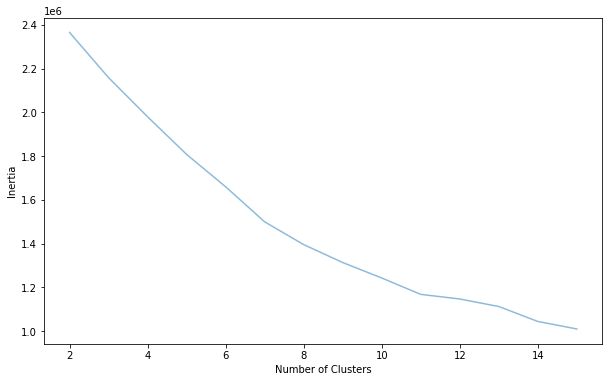

In [68]:
min_range = 2
max_range = 16

inertia = []
k_list = range(min_range, max_range)

for k in k_list:
    km = KMeans(n_clusters = k, random_state= 0)
    km.fit(feat_norm) 
    score = km.inertia_ #เอาระยะทางระหว่างกลุ่มออกมา
    inertia.append(score)

plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(min_range , max_range) , inertia , '-' , alpha = 0.5)

plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [69]:
def calculate_wcss(data):
    wcss = []
    for n in range(min_range, max_range):
        kmeans = KMeans(n_clusters=n,random_state=0)
        kmeans.fit(feat_norm)
        wcss.append(kmeans.inertia_)
    
    return wcss

from math import sqrt
#calculate 
def optimal_number_of_clusters(wcss):
    x1, y1 = min_range, wcss[0]
    x2, y2 = max_range, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
    

# calculating the within clusters sum-of-squares for n cluster amounts
sum_of_squares = calculate_wcss(feat_norm)
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
print('Number fo cluster =', n)

Number fo cluster = 8


In [70]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

for k in range(4, kmax+1):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(feat_norm)
    labels = kmeans.labels_
    sil.append(silhouette_score(feat_norm, labels, metric = 'euclidean'))

4
5
6
7
8
9
10
11
12
13
14
15


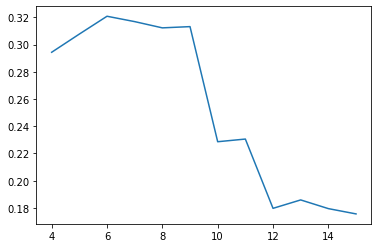

In [71]:
cluster = list(range(4, kmax+1))
plt.plot(cluster, sil)
plt.show()

In [72]:
number_of_clusters = n

km = KMeans(n_clusters=number_of_clusters, random_state=0)
km.fit(feat_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [73]:
result = feat.copy()
result['cluster'] = km.predict(feat_norm)

In [74]:
result

,all_shop_amount_avg,all_shop_amount_total,all_shop_distance_avg,all_shop_distance_max,all_shop_distance_min,all_shop_price_avg,all_shop_quantity_avg,all_shop_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used,cluster
0,711.082957,377585.05,1434.919023,4082.522163,985.876199,157.524670,5.819209,3090,522.057143,40198.40,77.0,4082.522163,319.670130,1.415584,109.0,743.142401,337386.65,454.0,985.876199,130.024229,6.566079,2981.0,0.000000,0.00,0.0,2372.096966,0.000000,0.000,0.0,0.0,0.0,0.0,4929.804616,0.0,0.0,0.0,0.000000,0.00,0.0,3284.386737,0.000000,0.000000,0.0,2.0,4
1,561.797342,391010.95,909.767645,2295.483922,254.948322,109.571121,6.477011,4508,188.097143,19750.20,105.0,1115.343265,142.557619,1.428571,150.0,242.436000,42426.30,175.0,2295.483922,100.493143,2.685714,470.0,127.330000,2546.60,20.0,670.900808,102.972500,1.450,29.0,0.0,0.0,0.0,2048.060476,0.0,0.0,0.0,823.959217,326287.85,396.0,254.948322,105.169697,9.744949,3859.0,4.0,0
2,272.654421,89430.65,1498.947080,2831.772778,754.295604,112.949695,2.481707,814,187.853125,6011.30,32.0,1418.834823,171.334375,1.125000,36.0,280.259135,29146.95,104.0,2831.772778,123.926442,2.240385,233.0,96.169231,1250.20,13.0,1286.818922,96.169231,1.000,13.0,0.0,0.0,0.0,1545.196292,0.0,0.0,0.0,296.213408,53022.20,179.0,754.295604,97.353352,2.972067,532.0,4.0,1
3,298.846975,83976.00,561.659026,2210.382172,362.791790,130.714591,2.306050,648,249.870000,4997.40,20.0,1104.382980,249.870000,1.000000,20.0,134.420000,672.10,5.0,2210.382172,134.420000,1.000000,5.0,251.459200,31432.40,125.0,617.287131,104.158400,2.328,291.0,0.0,0.0,0.0,2181.685243,0.0,0.0,0.0,357.817557,46874.10,131.0,362.791790,137.721374,2.534351,332.0,4.0,1
4,89.610000,896.10,605.362794,1375.118437,275.467519,84.600000,1.300000,13,0.000000,0.00,0.0,1913.762923,0.000000,0.000000,0.0,48.383333,145.15,3.0,1375.118437,31.683333,2.000000,6.0,107.278571,750.95,7.0,275.467519,107.278571,1.000,7.0,0.0,0.0,0.0,2961.303452,0.0,0.0,0.0,0.000000,0.00,0.0,1172.377265,0.000000,0.000000,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,179.445302,26737.35,4760.890107,5965.670720,2816.331925,107.762081,1.644295,245,173.826630,15992.05,92.0,5965.670720,111.465217,1.706522,157.0,188.514035,10745.30,57.0,2816.331925,101.785088,1.543860,88.0,0.000000,0.00,0.0,4433.447059,0.000000,0.000,0.0,0.0,0.0,0.0,7124.988593,0.0,0.0,0.0,0.000000,0.00,0.0,5338.820011,0.000000,0.000000,0.0,2.0,3
60361,415.319925,110475.10,1168.945014,1168.945014,1168.945014,133.146429,4.041353,1075,415.319925,110475.10,266.0,1168.945014,133.146429,4.041353,1075.0,0.000000,0.00,0.0,4000.781819,0.000000,0.000000,0.0,0.000000,0.00,0.0,2373.705593,0.000000,0.000,0.0,0.0,0.0,0.0,429.329248,0.0,0.0,0.0,0.000000,0.00,0.0,1467.533750,0.000000,0.000000,0.0,1.0,1
60362,150.637500,1205.10,938.862831,938.862831,938.862831,116.106250,1.250000,10,150.637500,1205.10,8.0,938.862831,116.106250,1.250000,10.0,0.000000,0.00,0.0,2375.333230,0.000000,0.000000,0.0,0.000000,0.00,0.0,785.653306,0.000000,0.000,0.0,0.0,0.0,0.0,2044.899464,0.0,0.0,0.0,0.000000,0.00,0.0,247.787194,0.000000,0.000000,0.0,1.0,1
60363,425.015385,22100.80,1727.251996,17

In [75]:
result['cluster'].value_counts()

1    38559
2     7593
4     5468
3     4855
5     2160
0      938
7      715
6       77
Name: cluster, dtype: int64

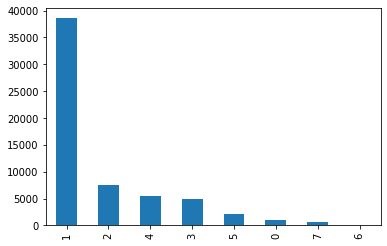

In [76]:
result.cluster.value_counts().plot.bar()

In [77]:
condition = 1

filter_cluster_df = result.loc[result['cluster']==condition]
filter_cluster_df[['shop_id1_amount_avg', 'shop_id1_distance_avg', 'shop_id1_price_avg', 'shop_id1_quantity_avg', 'cluster']]

,shop_id1_amount_avg,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,cluster
2,187.853125,1418.834823,171.334375,1.125000,1
3,249.870000,1104.382980,249.870000,1.000000,1
4,0.000000,1913.762923,0.000000,0.000000,1
6,124.097368,2068.842708,117.755263,1.052632,1
13,197.429091,2788.375177,169.947273,1.200000,1
...,...,...,...,...,...
60359,175.086552,1280.162184,127.000690,1.468966,1
60361,415.319925,1168.945014,133.146429,4.041353,1
60362,150.637500,938.862831,116.106250,1.250000,1
60363,425.015385,1727.251996,356.185577,1.423077,1


In [78]:
print('Feature dimension', len(feat_norm.columns))

Feature dimension 44


In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(feat_norm)

In [81]:
pca_feat

array([[ 0.69793326, -3.62572774],
       [ 6.82633342,  6.29682411],
       [ 1.05571697,  3.17439352],
       ...,
       [-1.85646703,  2.73131659],
       [-2.09811185,  1.43468098],
       [-2.12727645,  2.47608882]])

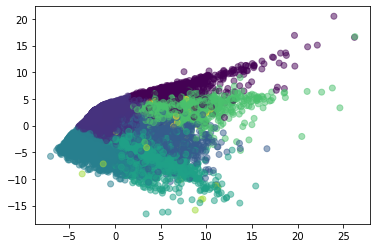

<Figure size 1440x1440 with 0 Axes>

In [82]:
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1], c=result['cluster'], alpha=0.5)
plt.figure(figsize=(20,20))
plt.show()

In [83]:
avg_cluster = result.groupby(by='cluster').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,cluster,all_shop_amount_avg,all_shop_amount_total,all_shop_distance_avg,all_shop_distance_max,all_shop_distance_min,all_shop_price_avg,all_shop_quantity_avg,all_shop_quantity_total,shop_id1_amount_avg,shop_id1_amount_total,shop_id1_cnt_txn_total,shop_id1_distance_avg,shop_id1_price_avg,shop_id1_quantity_avg,shop_id1_quantity_total,shop_id2_amount_avg,shop_id2_amount_total,shop_id2_cnt_txn_total,shop_id2_distance_avg,shop_id2_price_avg,shop_id2_quantity_avg,shop_id2_quantity_total,shop_id3_amount_avg,shop_id3_amount_total,shop_id3_cnt_txn_total,shop_id3_distance_avg,shop_id3_price_avg,shop_id3_quantity_avg,shop_id3_quantity_total,shop_id4_amount_avg,shop_id4_amount_total,shop_id4_cnt_txn_total,shop_id4_distance_avg,shop_id4_price_avg,shop_id4_quantity_avg,shop_id4_quantity_total,shop_id5_amount_avg,shop_id5_amount_total,shop_id5_cnt_txn_total,shop_id5_distance_avg,shop_id5_price_avg,shop_id5_quantity_avg,shop_id5_quantity_total,shop_used
0,0,638.944150,443181.529371,766.996796,2056.429696,408.692046,132.782451,6.354498,4321.295309,378.670259,98427.070256,199.173774,1107.216358,221.931765,2.203746,744.319829,142.696342,18939.869190,56.973348,2549.996122,95.441730,1.049473,162.351812,95.768074,11195.954371,39.190832,1053.049728,58.010947,0.910449,111.923241,31.730931,2740.968284,9.353945,1939.790050,21.851059,0.282348,26.736674,766.320471,311877.667271,400.513859,489.506353,137.898689,7.751090,3275.963753,3.217484
1,1,300.191791,84014.626893,1873.758361,2627.487621,1310.473102,177.375850,2.117892,659.782256,314.922094,53293.133801,150.137374,2197.107731,214.416360,1.762426,379.842008,160.294175,22879.173354,74.684976,2452.374182,97.366089,1.272710,199.789025,48.725020,3993.367021,17.256723,1694.421630,33.134028,0.468107,40.780596,28.448661,1863.152809,7.788480,2459.764346,19.855875,0.258146,18.890869,28.242720,1985.799908,9.080500,1706.861833,20.102759,0.272941,20.479758,2.250447
2,2,672.431834,523483.074944,1990.405079,2880.883447,1196.831330,175.576799,5.561097,4317.416041,756.443166,464258.219729,601.981825,2066.963304,189.287477,6.181757,3777.215330,213.759508,45384.926136,127.530094,2534.112703,113.194577,1.775856,398.558277,73.448765,7647.658659,30.447649,1695.221271,47.016445,0.727361,78.270512,33.730820,2344.995200,10.188200,2447.917528,24.461026,0.314557,23.331226,44.461021,3847.275221,17.905834,1656.281723,31.472753,0.441162,40.040695,2.787172
3,3,374.913713,162673.489475,4543.544071,5737.868618,3550.939378,180.177217,2.687695,1273.751802,371.482347,98832.491967,212.976107,5422.148408,219.827796,2.222391,726.114109,246.274641,61144.520330,140.049022,4181.033766,114.326073,1.951612,520.655613,26.187644,1629.842636,7.329145,4847.841654,19.814811,0.253198,16.270649,15.004677,530.922781,2.561689,6179.201130,11.250300,0.124519,5.246962,11.443446,535.711761,2.868177,5229.683587,9.001038,0.110186,5.464470,2.081153
4,4,755.399818,561365.366587,1685.399636,3269.997472,987.446995,154.603234,6.568523,4851.243416,377.181748,96522.742712,224.178310,3237.190455,232.233873,2.186318,706.563826,956.363761,459731.268544,514.379298,1177.339963,227.294139,7.772125,4092.508961,47.854290,3828.339548,16.918252,1828.265267,34.272947,0.470268,39.246708,13.417316,476.798171,2.596196,4096.595522,11.358087,0.114077,4.712875,16.654260,806.217612,4.181236,2546.639649,13.574670,0.161629,8.211046,2.479883
5,5,619.592327,456901.359097,1073.429793,2072.739906,534.181838,137.565068,6.033260,4357.455556,373.701403,109235.817245,229.546759,1775.734699,209.296537,2.356386,816.780556,208.906982,36129.595255,99.008333,1898.754203,123.608458,1.530072,306.145370,759.740417,305989.593704,396.036111,662.758150,138.526967,7.653704,3177.410185,20.203379,968.203958,4.650463,2630.447283,15.827697,0.179239,9.604167,58.845409,4578.148935,21.519907,1079.732221,42.908800,0.571191,47.515278,3.217593
6,6,8750.044590,74378.304545,2020.194766,2749.241408,1876.809845,8517.725960,2.065263,430.000000,16346.839746,28182.888961,2.103896,2606.183482,16184.748631,0.983225,2.233766

In [84]:
avg_cluster.columns

Index(['cluster', 'all_shop_amount_avg', 'all_shop_amount_total',
       'all_shop_distance_avg', 'all_shop_distance_max',
       'all_shop_distance_min', 'all_shop_price_avg', 'all_shop_quantity_avg',
       'all_shop_quantity_total', 'shop_id1_amount_avg',
       'shop_id1_amount_total', 'shop_id1_cnt_txn_total',
       'shop_id1_distance_avg', 'shop_id1_price_avg', 'shop_id1_quantity_avg',
       'shop_id1_quantity_total', 'shop_id2_amount_avg',
       'shop_id2_amount_total', 'shop_id2_cnt_txn_total',
       'shop_id2_distance_avg', 'shop_id2_price_avg', 'shop_id2_quantity_avg',
       'shop_id2_quantity_total', 'shop_id3_amount_avg',
       'shop_id3_amount_total', 'shop_id3_cnt_txn_total',
       'shop_id3_distance_avg', 'shop_id3_price_avg', 'shop_id3_quantity_avg',
       'shop_id3_quantity_total', 'shop_id4_amount_avg',
       'shop_id4_amount_total', 'shop_id4_cnt_txn_total',
       'shop_id4_distance_avg', 'shop_id4_price_avg', 'shop_id4_quantity_avg',
       'shop_id4_quant

In [85]:
shop_amout = avg_cluster[['shop_id1_amount_total', 'shop_id2_amount_total', 'shop_id3_amount_total', 'shop_id4_amount_total', 'shop_id5_amount_total', 'cluster']]

shop_distance = avg_cluster[['shop_id1_distance_avg', 'shop_id2_distance_avg', 'shop_id3_distance_avg', 'shop_id4_distance_avg', 'shop_id5_distance_avg', 'cluster']]

In [86]:
df = pd.melt(shop_amout, id_vars="cluster", var_name="shop_id", value_name="total")
df.sample(10)

,cluster,shop_id,total
3,3,shop_id1_amount_total,98832.491967
1,1,shop_id1_amount_total,53293.133801
30,6,shop_id4_amount_total,15488.331169
21,5,shop_id3_amount_total,305989.593704
33,1,shop_id5_amount_total,1985.799908
36,4,shop_id5_amount_total,806.217612
26,2,shop_id4_amount_total,2344.995200
37,5,shop_id5_amount_total,4578.148935
14,6,shop_id2_amount_total,22976.491558
0,0,shop_id1_amount_total,98427.070256


# **Interpretation**

In [91]:
from math import pi

def plot_radar_df(df, feat_cols, label_col, selected_label_list, split_chart=False, dpi=100, n_cols = 3, fig_h=8, fig_w=8):
    
    # min-max normalization
    for col in feat_cols:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    # select data:
    row_idx = df[label_col].isin(selected_label_list)
    data = df[row_idx]
    data = data[feat_cols].values

    # number of variable
    N = len(feat_cols)

    # angle of each axis in the plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # set color
    my_color = plt.cm.get_cmap("Set2", len(df.index))

    # set font size and subplot
    if not split_chart:
        ax = plt.subplot(111, polar=True )
        size = 10
    else:
        size = 5
        dpi = 1.5*dpi

    for i in range(len(data)):

        title = label_col +'_' +str(selected_label_list[i])

        # Initialise the spider plot
        if split_chart:
            n_rows = np.ceil(len(df)/n_cols)
            ax = plt.subplot(n_rows,n_cols,i+1, polar=True )

        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], feat_cols, color='grey', size=int(size*0.8))

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.20, 0.4, 0.6, 0.8,  1], \
                   ["20%","40%","60%","80%","100%"], color="grey", size=size)
        plt.ylim(0,1)

        # Plot
        values = list(data[i,:])
        values += values[:1]
        ax.plot(angles, values, color=my_color(i), linewidth=2, linestyle='solid', label=title)
        ax.fill(angles, values, color=my_color(i), alpha=0.4)

        # Add a title or legend
        if split_chart:
            plt.title(title, size=11, color=my_color(i), y=1.2)
        else:
            plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

        # Adjust DPI
        fig = plt.gcf()
        fig.set_dpi(dpi)
        fig.set_figheight(fig_h)
        fig.set_figwidth(fig_w)

    plt.tight_layout()
    plt.show()

In [89]:
avg_cluster.columns

Index(['cluster', 'all_shop_amount_avg', 'all_shop_amount_total',
       'all_shop_distance_avg', 'all_shop_distance_max',
       'all_shop_distance_min', 'all_shop_price_avg', 'all_shop_quantity_avg',
       'all_shop_quantity_total', 'shop_id1_amount_avg',
       'shop_id1_amount_total', 'shop_id1_cnt_txn_total',
       'shop_id1_distance_avg', 'shop_id1_price_avg', 'shop_id1_quantity_avg',
       'shop_id1_quantity_total', 'shop_id2_amount_avg',
       'shop_id2_amount_total', 'shop_id2_cnt_txn_total',
       'shop_id2_distance_avg', 'shop_id2_price_avg', 'shop_id2_quantity_avg',
       'shop_id2_quantity_total', 'shop_id3_amount_avg',
       'shop_id3_amount_total', 'shop_id3_cnt_txn_total',
       'shop_id3_distance_avg', 'shop_id3_price_avg', 'shop_id3_quantity_avg',
       'shop_id3_quantity_total', 'shop_id4_amount_avg',
       'shop_id4_amount_total', 'shop_id4_cnt_txn_total',
       'shop_id4_distance_avg', 'shop_id4_price_avg', 'shop_id4_quantity_avg',
       'shop_id4_quant

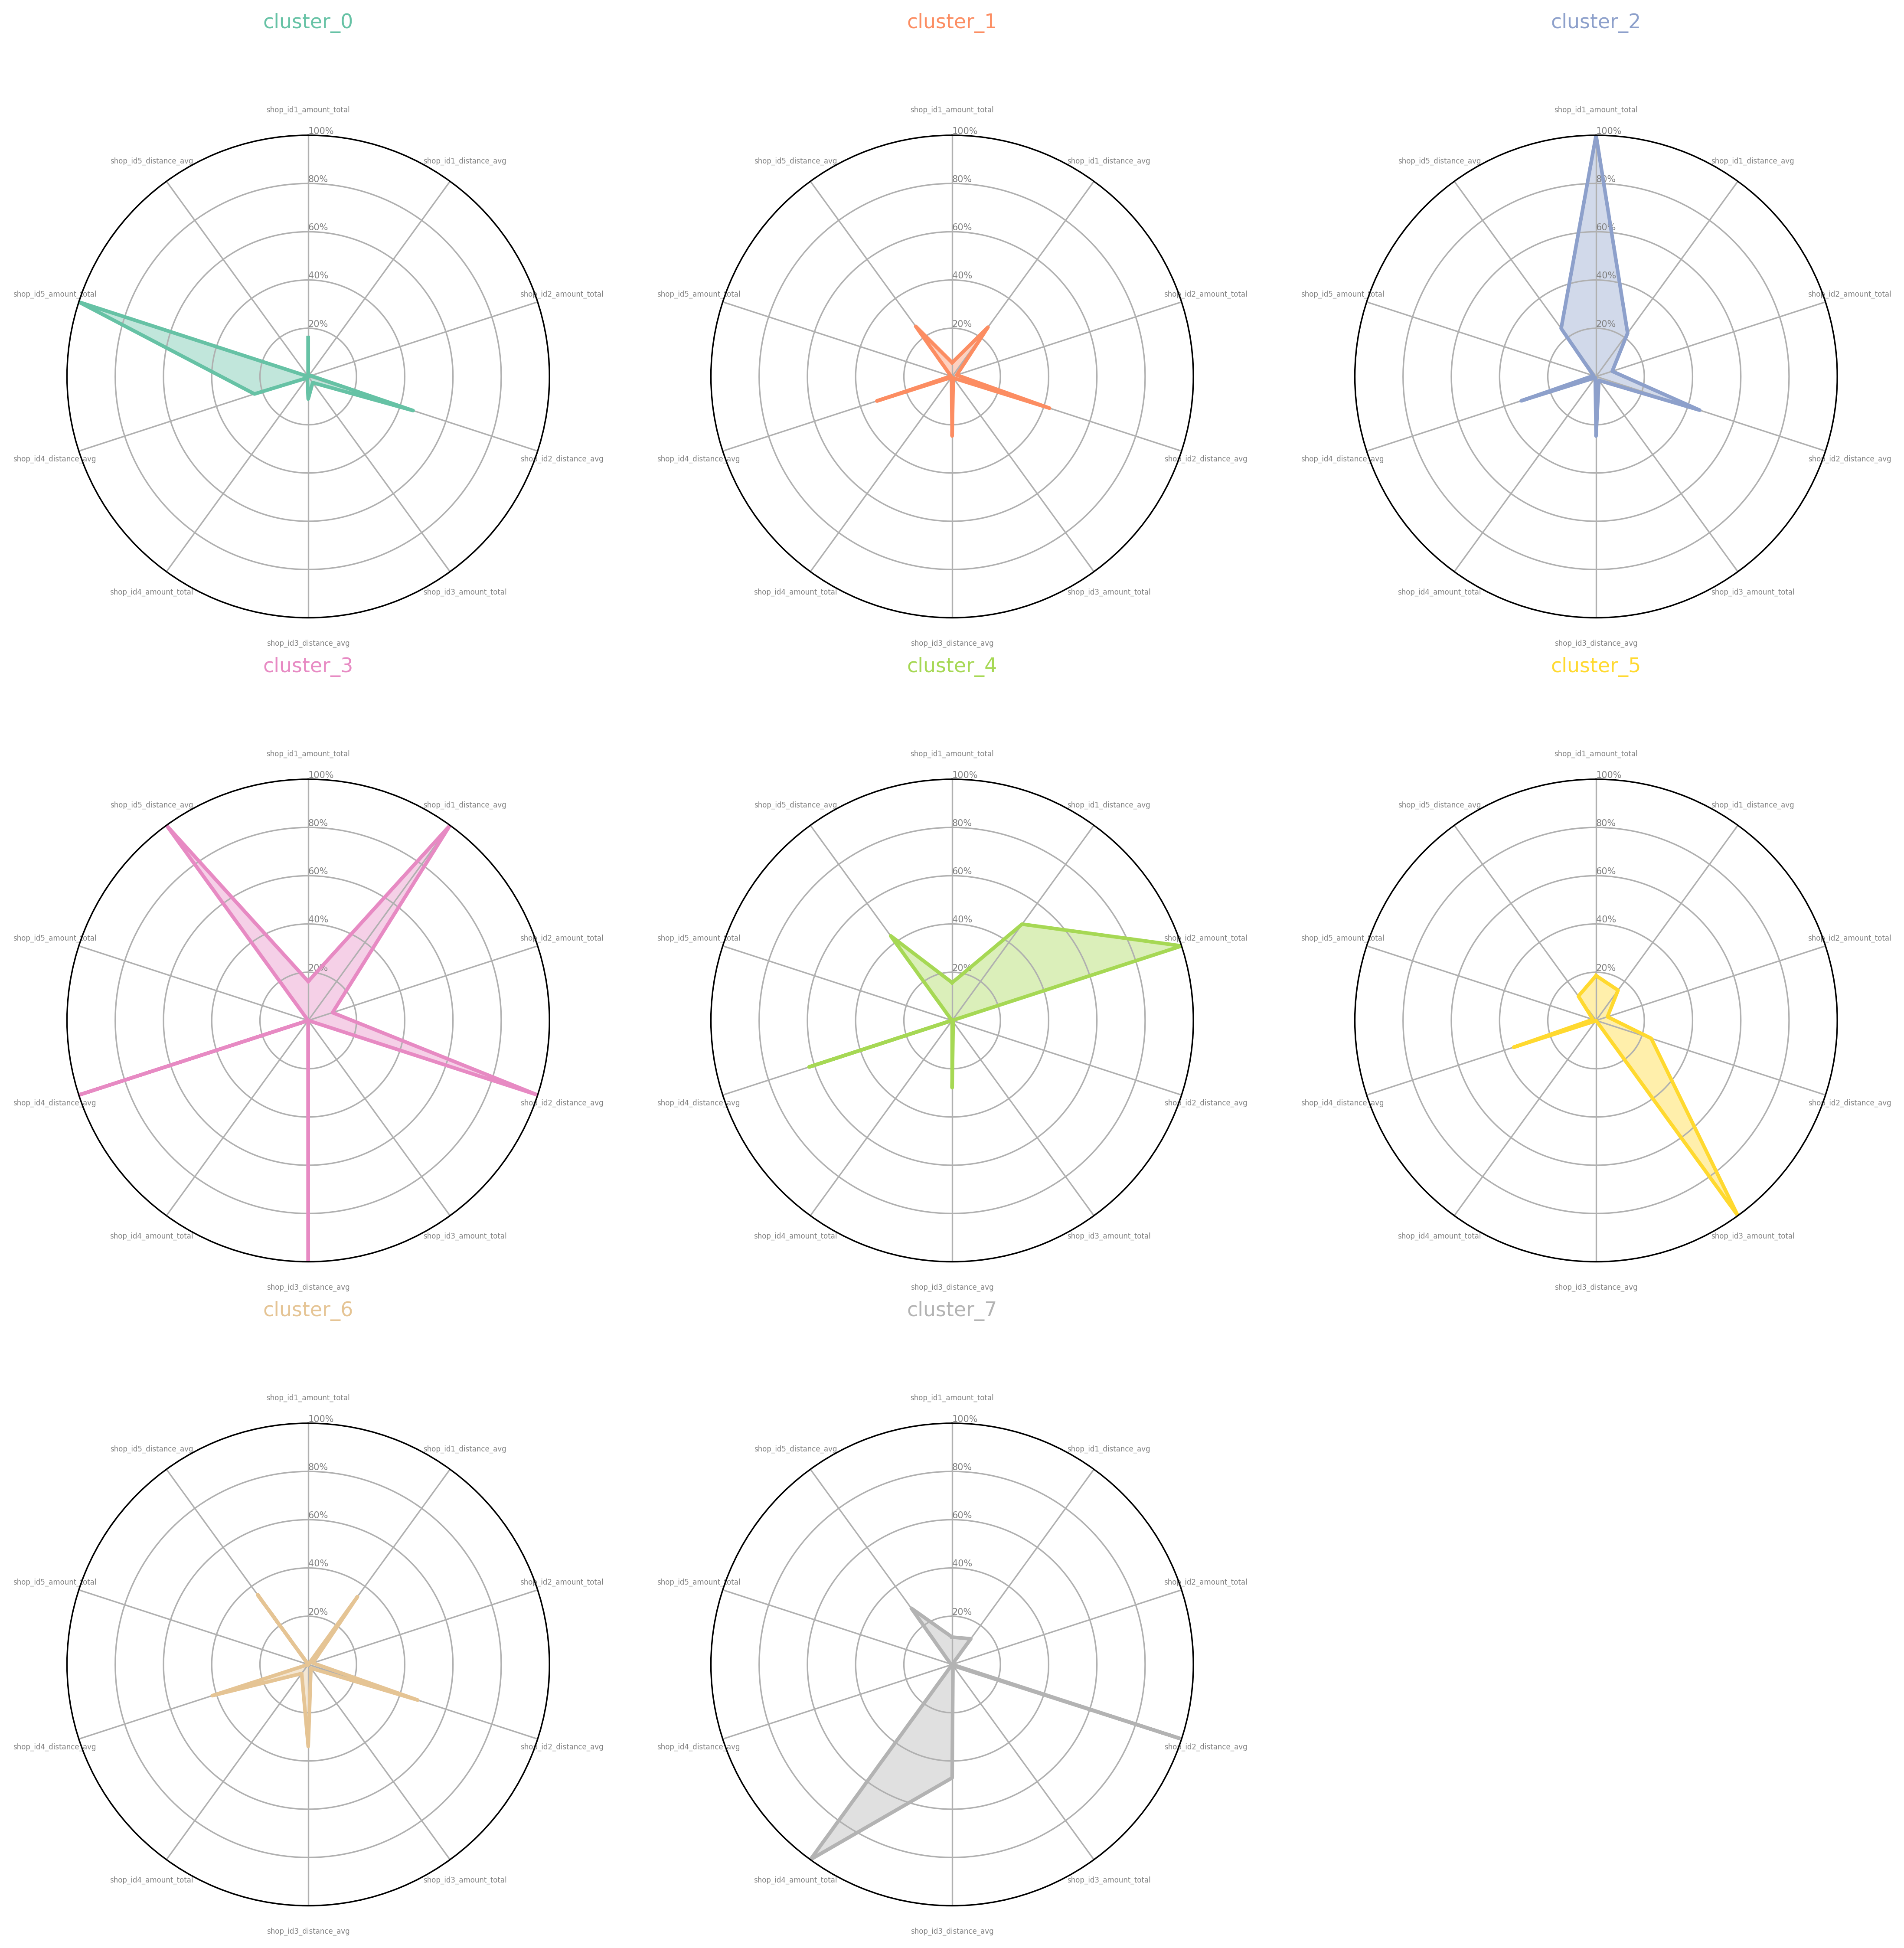

In [90]:
feat_cols = [
       'shop_id1_amount_total',  'shop_id1_distance_avg',      
       'shop_id2_amount_total', 'shop_id2_distance_avg',      
       'shop_id3_amount_total', 'shop_id3_distance_avg',      
       'shop_id4_amount_total', 'shop_id4_distance_avg',      
       'shop_id5_amount_total', 'shop_id5_distance_avg',
       ]

label_col = 'cluster'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=True, dpi=200, n_cols=3, fig_h=15, fig_w=15)

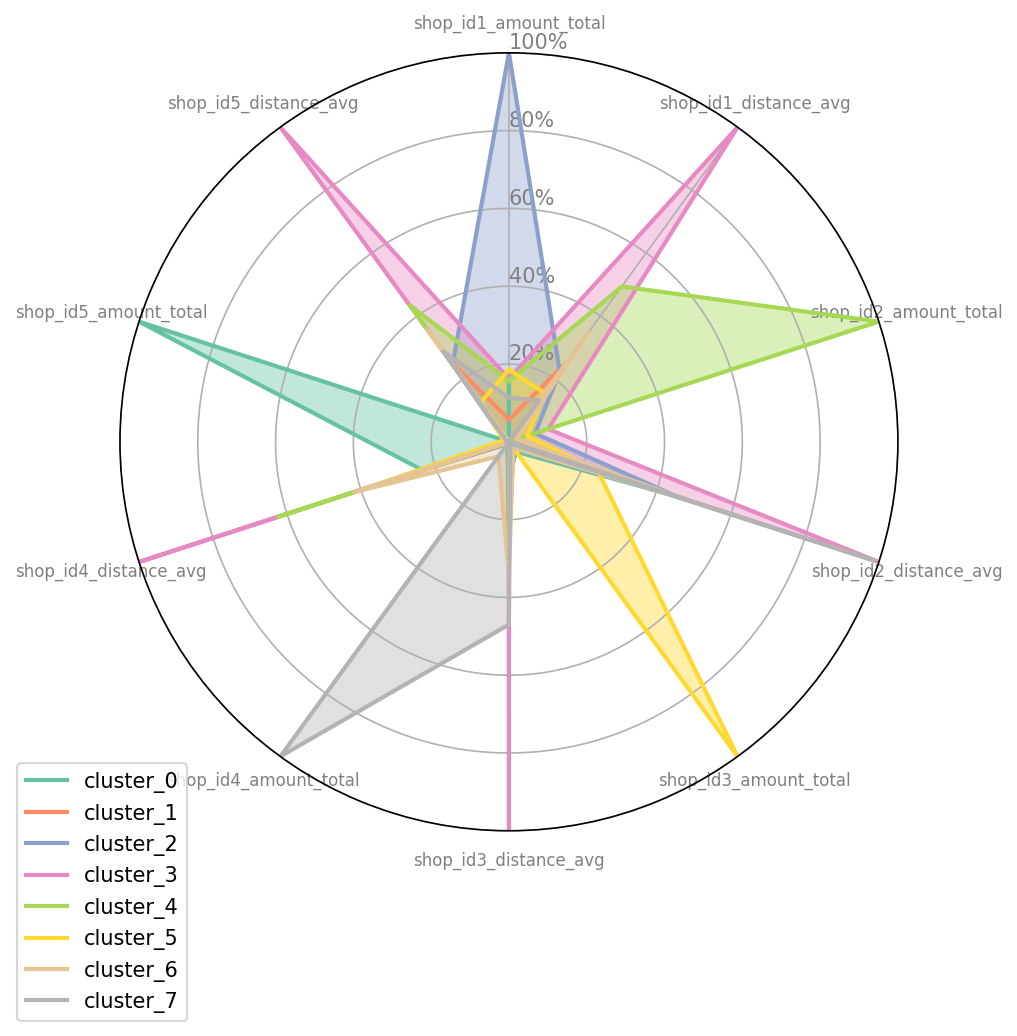

In [92]:
label_col = 'cluster'
selected_label_list = [i for i in range(8)]

plot_radar_df(avg_cluster, feat_cols, label_col, selected_label_list, split_chart=False, dpi=150, n_cols=3, fig_h=7, fig_w=7)